In [15]:
import pickle
with open('merged_df.pkl', 'rb') as file:
    merged_df = pickle.load(file)

In [16]:
merged_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,smoothness_mean,texture_worst,smoothness_worst,concave_points_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.27760,0.30010,0.14710,0.2419,...,184.6,2019.0,0.6656,0.7119,0.4601,0.11890,0.11840,17.33,0.1622,0.2654
1,842517,1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,0.1812,...,158.8,1956.0,0.1866,0.2416,0.2750,0.08902,0.08474,23.41,0.1238,0.1860
2,84300903,1,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,0.2069,...,152.5,1709.0,0.4245,0.4504,0.3613,0.08758,0.10960,25.53,0.1444,0.2430
4,84358402,1,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,0.1809,...,152.2,1575.0,0.2050,0.4000,0.2364,0.07678,0.10030,16.67,0.1374,0.1625
5,843786,1,12.45,15.70,82.57,477.1,0.17000,0.15780,0.08089,0.2087,...,103.4,741.6,0.5249,0.5355,0.3985,0.12440,0.12780,23.75,0.1791,0.1741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,1,20.92,25.09,143.00,1347.0,0.22360,0.31740,0.14740,0.2149,...,179.1,1819.0,0.4186,0.6599,0.2929,0.09873,0.10990,29.41,0.1407,0.2542
564,926424,1,21.56,22.39,142.00,1479.0,0.11590,0.24390,0.13890,0.1726,...,166.1,2027.0,0.2113,0.4107,0.2060,0.07115,0.11100,26.40,0.1410,0.2216
565,926682,1,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,0.1752,...,155.0,1731.0,0.1922,0.3215,0.2572,0.06637,0.09780,38.25,0.1166,0.1628
566,926954,1,16.60,28.08,108.30,858.1,0.10230,0.09251,0.05302,0.1590,...,126.7,1124.0,0.3094,0.3403,0.2218,0.07820,0.08455,34.12,0.1139,0.1418


<Axes: >

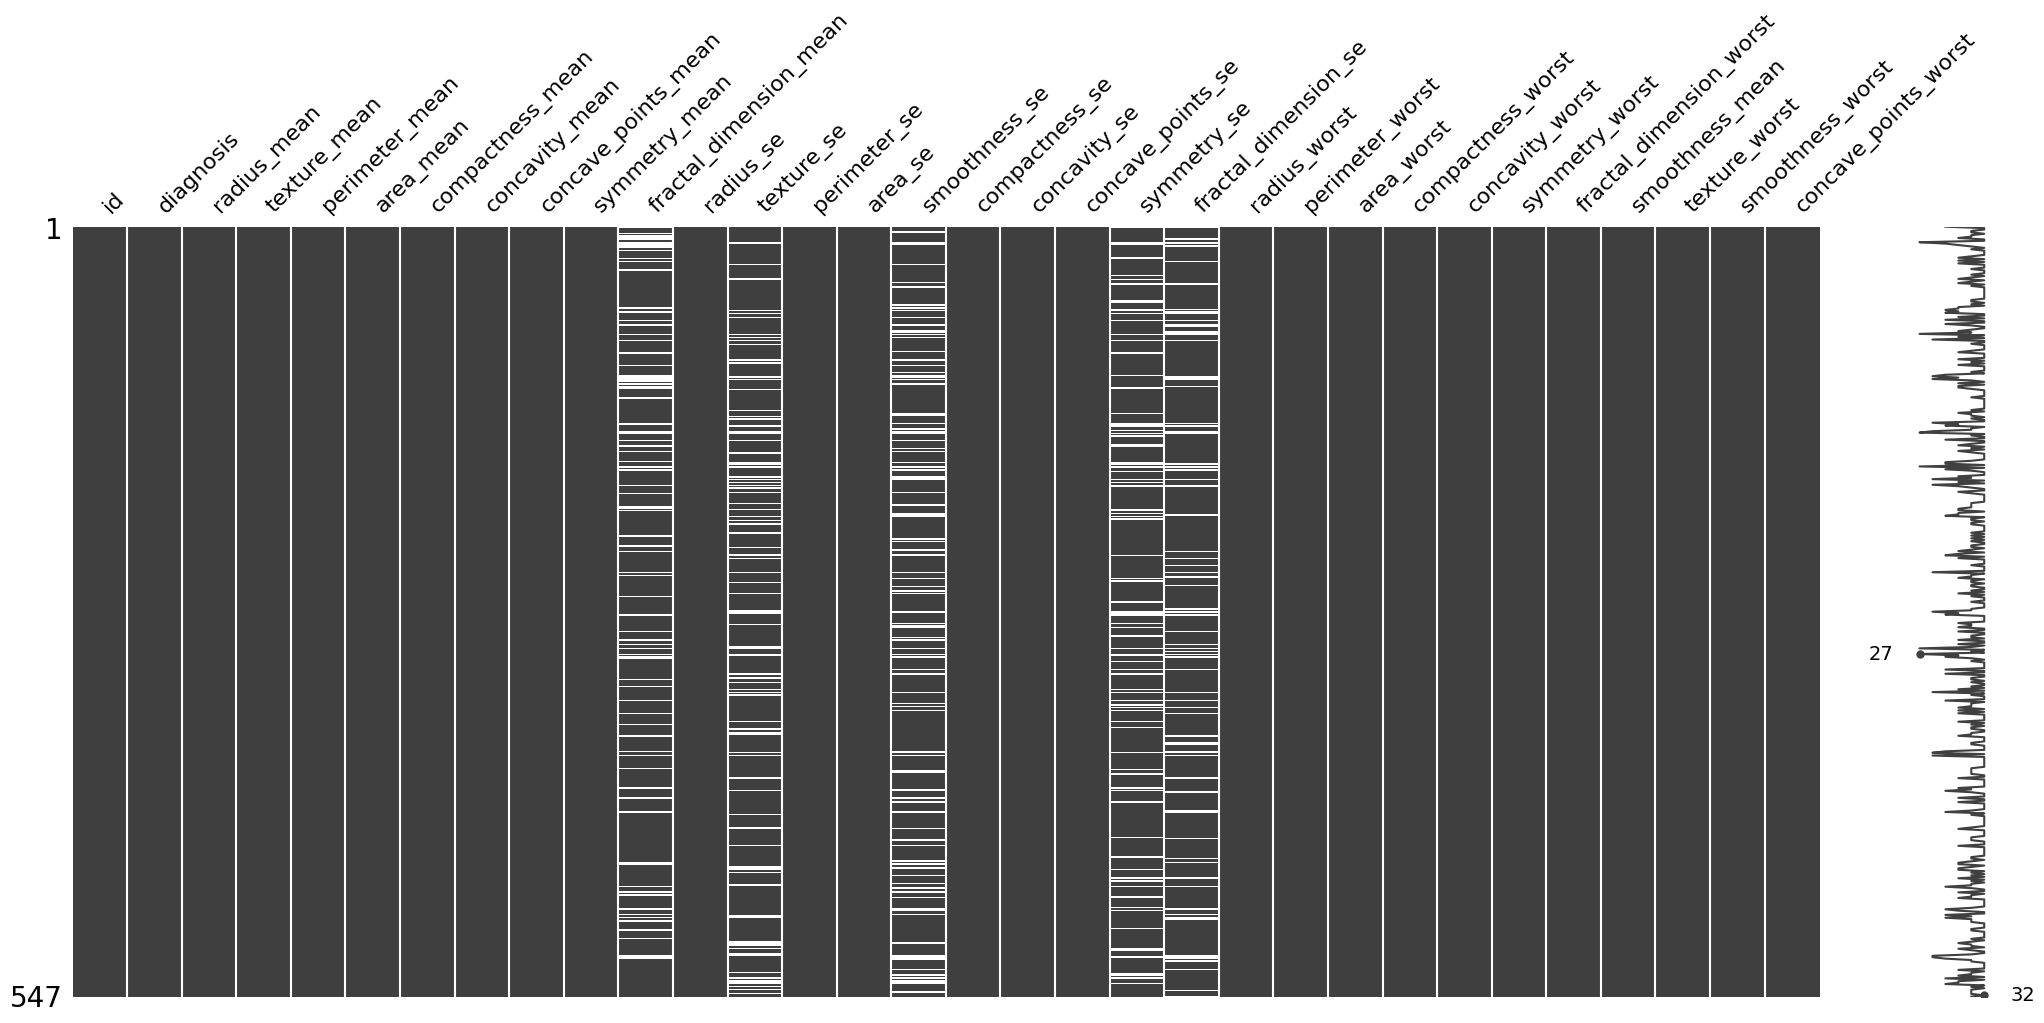

In [17]:
import missingno as msno
msno.matrix(merged_df)

In [20]:
df_nulls = merged_df.copy()
for col in df_nulls:
    if df_nulls[col].isna().sum() == 0:
        del df_nulls[col]
df_nulls

,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,fractal_dimension_se
0,NaN,0.9053,0.006399,NaN,NaN
1,0.05667,0.7339,0.005225,0.01389,0.003532
2,0.05999,0.7869,0.006150,0.02250,0.004571
4,0.05883,0.7813,NaN,0.01756,0.005115
5,NaN,0.8902,0.007510,0.02165,0.005082
...,...,...,...,...,...
563,0.06879,1.0260,0.006399,0.02057,NaN
564,0.05623,1.2560,NaN,0.01114,0.004239
565,0.05533,NaN,0.005769,0.01898,0.002498
566,0.05648,1.0750,0.005903,0.01318,0.003892


In [21]:
missing_percentage = df_nulls.isnull().mean() * 100

# Display the missing percentages
missing_percentage = missing_percentage.reset_index()
missing_percentage.columns = ['Column', 'Missing Percentage']
missing_percentage

,Column,Missing Percentage
0,fractal_dimension_mean,15.722121
1,texture_se,17.367459
2,smoothness_se,19.012797
3,symmetry_se,16.270567
4,fractal_dimension_se,14.076782


In [24]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import zscore, ks_2samp
from sklearn.impute import KNNImputer
final_df = merged_df.copy()
imp_cols = final_df.select_dtypes(include = ['float64', 'int64']).columns
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = pd.DataFrame(knn_imputer.fit_transform(final_df[imp_cols]),columns = imp_cols)

In [25]:
final_df[imp_cols] = imputed_data
final_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,smoothness_mean,texture_worst,smoothness_worst,concave_points_worst
0,842302.0,1,17.99,10.38,122.80,1001.0,0.27760,0.3001,0.14710,0.2419,...,184.6,2019.0,0.6656,0.7119,0.4601,0.11890,0.11840,17.33,0.1622,0.2654
1,842517.0,1,20.57,17.77,132.90,1326.0,0.07864,0.0869,0.07017,0.1812,...,158.8,1956.0,0.1866,0.2416,0.2750,0.08902,0.08474,23.41,0.1238,0.1860
2,84300903.0,1,19.69,21.25,130.00,1203.0,0.15990,0.1974,0.12790,0.2069,...,152.5,1709.0,0.4245,0.4504,0.3613,0.08758,0.10960,25.53,0.1444,0.2430
4,843786.0,1,12.45,15.70,82.57,477.1,0.17000,0.1578,0.08089,0.2087,...,103.4,741.6,0.5249,0.5355,0.3985,0.12440,0.12780,23.75,0.1791,0.1741
5,844359.0,1,18.25,19.98,119.60,1040.0,0.10900,0.1127,0.07400,0.1794,...,153.2,1606.0,0.2576,0.3784,0.3063,0.08368,0.09463,27.66,0.1442,0.1932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
564,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

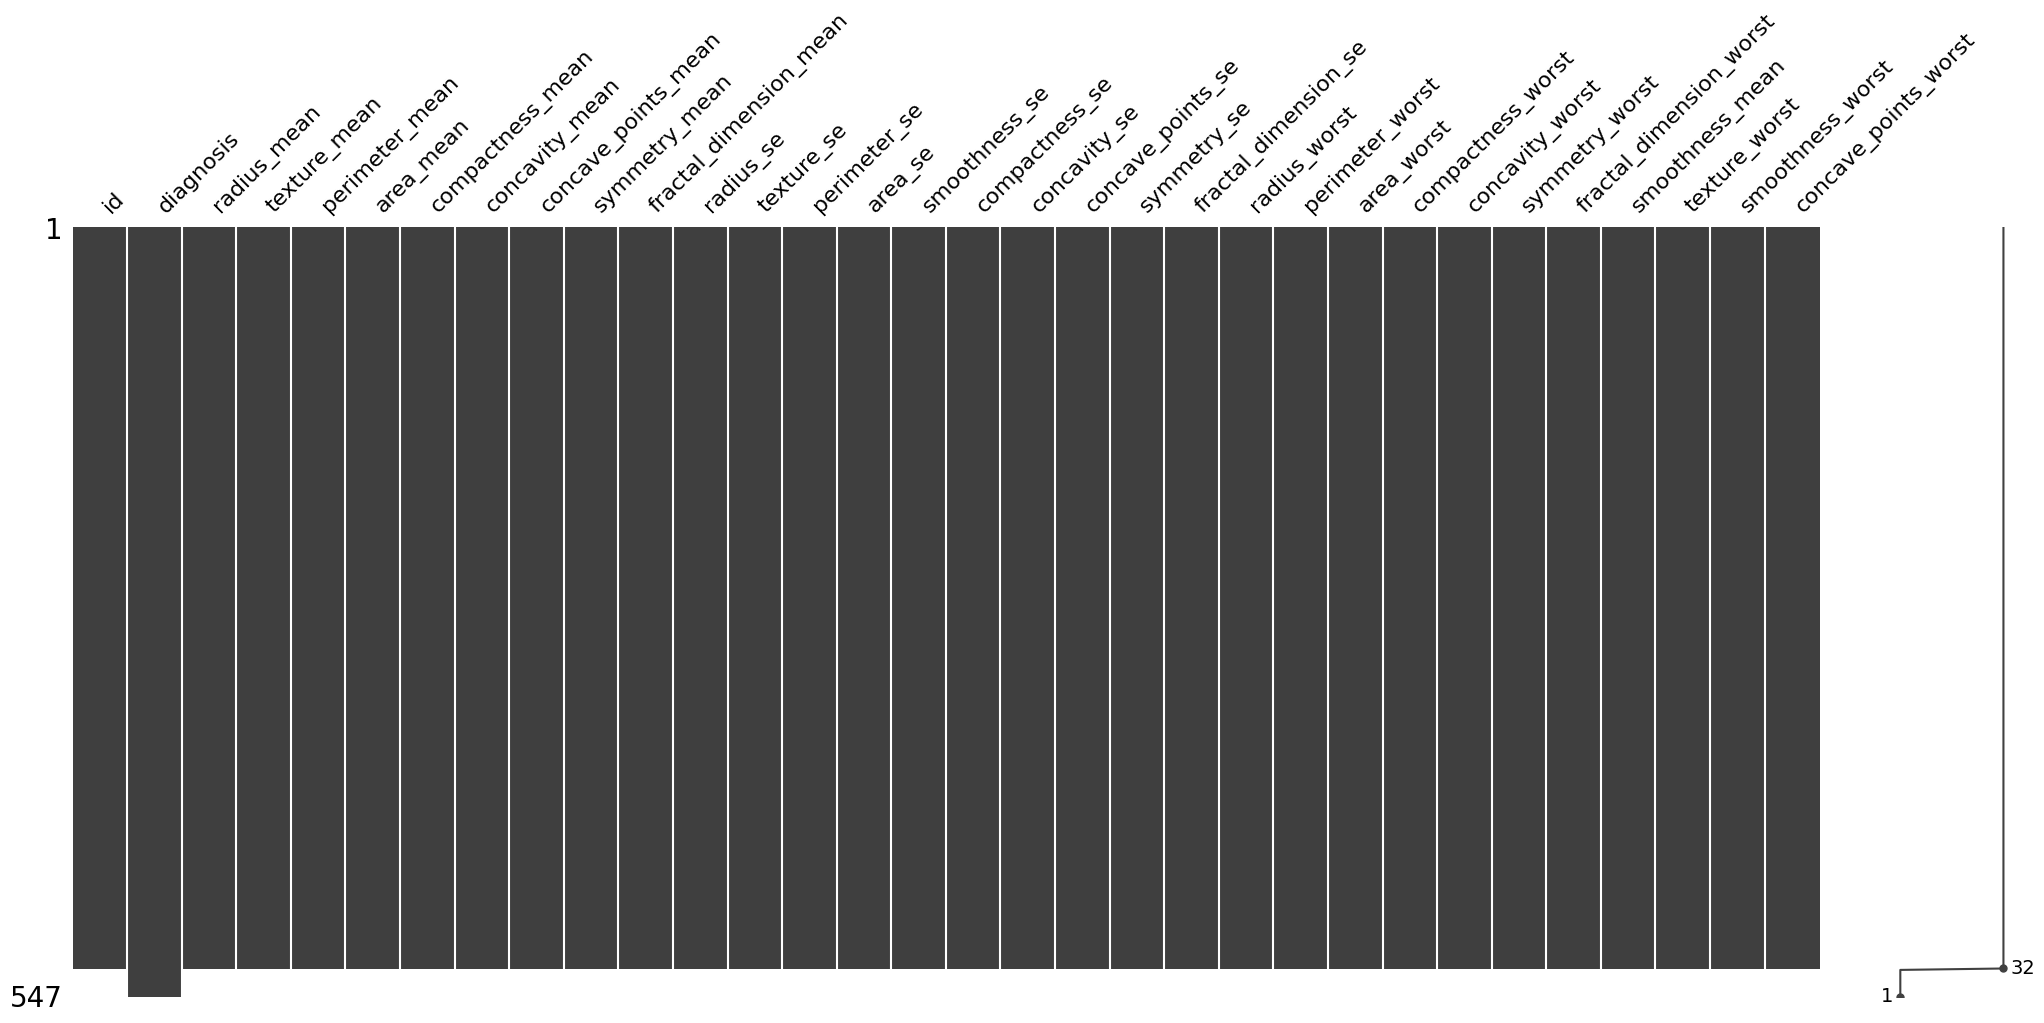

In [27]:
msno.matrix(final_df)

In [28]:
final_df.isnull().sum()

id                         20
diagnosis                   0
radius_mean                20
texture_mean               20
perimeter_mean             20
area_mean                  20
compactness_mean           20
concavity_mean             20
concave_points_mean        20
symmetry_mean              20
fractal_dimension_mean     20
radius_se                  20
texture_se                 20
perimeter_se               20
area_se                    20
smoothness_se              20
compactness_se             20
concavity_se               20
concave_points_se          20
symmetry_se                20
fractal_dimension_se       20
radius_worst               20
perimeter_worst            20
area_worst                 20
compactness_worst          20
concavity_worst            20
symmetry_worst             20
fractal_dimension_worst    20
smoothness_mean            20
texture_worst              20
smoothness_worst           20
concave_points_worst       20
dtype: int64